In [1]:
# importing of modules for CIFAR-100 CNN 
# from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils, backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras import regularizers

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt
# import scipy

# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

In [2]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#training constants
BATCH_SIZE = 64
N_EPOCH = 20
N_CLASSES = 100
VERBOSE = 1
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 0.0001
OPTIM = Adam(learning_rate=LEARNING_RATE)

print('Main variables initialised.')


# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [4]:
# Load CIFAR-100 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(y_train.shape[0], 'train labels')

print(X_test.shape[0], 'test samples')
print(y_test.shape[0], 'test labels')

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
 
# convert to categorical
output_Y_train = utils.to_categorical(y_train, N_CLASSES)
output_Y_test = utils.to_categorical(y_test, N_CLASSES) 


# Print shapes
print("output_Y_train shape:", output_Y_train.shape)
print("output_Y_test shape:", output_Y_test.shape)

# float and normalization
input_X_train = X_train.astype('float32')
input_X_test = X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
50000 train labels
10000 test samples
10000 test labels
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
output_Y_train shape: (50000, 100)
output_Y_test shape: (10000, 100)


In [5]:
# # visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
# Selected_Image = 0
# image = X_train[Selected_Image]
# # print ("Sample input image: " + str(image))
# plt.imshow(image)
# plt.show() 

# Selected_Image = 1
# image = X_train[Selected_Image]
# # print ("Sample input image: " + str(image))
# plt.imshow(image)
# plt.show() 

In [6]:
# Model

def get_model(lr = 0.001, units = 64):
    model = Sequential()
    model.add(Conv2D(units, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(N_CLASSES))
    model.add(Activation('softmax'))

    # model.summary()


    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

    return model

model = get_model(0.001)

model.summary()

num_hidden_layers = len(model.layers) - 2  # Excluding the input and output layers
print("Number of hidden layers:", num_hidden_layers)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       147712    
                                                                 
 activation_1 (Activation)   (None, 16, 16, 256)       0         
                                                        

In [7]:
# history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)
# score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=0)
# print("BATCH_SIZE", BATCH_SIZE)
# print("N_EPOCH", N_EPOCH)
# print("LEARNING_RATE", LEARNING_RATE)
# print("Test score/loss:", score[0])
# print('Test accuracy:', score[1])

EXPERIMENTS

WARNING: ONLY UNCOMMENT AND RUN THE TRAININGS THAT ARE INSIDE LOOPS IF USING A GPU WITH LARGE AMOUNT OF AVAILABLE VRAM, TESTING DONE ON LOCAL MACHINE WITH AN OVERCLOCKED NVIDIA GEFORCE RTX 4090 GPU WITH 24GB OF VRAM

NOTE: Exact values may be different from the report as this notebook was rerun.

BATCH SIZE


In [8]:
def batch_experiments(batches):

    for i in batches:
        model = get_model(lr= 0.0001)
        history = model.fit(input_X_train, output_Y_train, batch_size=i, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=0)
        score = model.evaluate(input_X_test, output_Y_test, batch_size=i, verbose=0)
        print("BATCH_SIZE", i)
        print("Test score/loss:", score[0])
        print('Test accuracy:', score[1])

batches = [64, 128, 256, 512, 1024]
# batch_experiments(batches)

In [9]:
# Batch   Size Accuracy   Loss 
# 64      0.0100          4.6087
# 128     0.3811          2.4941
# 256     0.4289          2.3147
# 512     0.4556          2.2264
# 1024    0.4458          2.2048


BATCH_SIZE = 512

LEARNING RATE  

In [10]:
def learning_rate_experiments(rates):

    for i in rates:
        model = get_model(lr=i)
        history = model.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=0)
        score = model.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
        print("LEARNING_RATE", i)
        print("Test score/loss:", score[0])
        print('Test accuracy:', score[1])

lr = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
# learning_rate_experiments(lr)

In [11]:
# Learning      Rate Accuracy   Loss
# 0.1           0.4482          2.2050
# 0.01          0.4315          2.3692
# 0.001         0.4664          2.1094
# 0.0001        0.4435          2.3408
# 0.00001       0.4499          2.2422
# 0.000001      0.4449          2.2583


LEARNING_RATE = 0.001
OPTIM = Adam(learning_rate=LEARNING_RATE)

HIDDEN LAYERS

In [12]:
model_8 = Sequential()
model_8.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model_8.add(Activation('relu'))
model_8.add(MaxPooling2D(pool_size=(2, 2)))
model_8.add(Dropout(0.25))


model_8.add(Flatten())
model_8.add(Dense(1024))
model_8.add(Activation('relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(N_CLASSES))
model_8.add(Activation('softmax'))




# compile the model
model_8.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


model_8.summary()

num_hidden_layers = len(model_8.layers) - 2  # Excluding the input and output layers
print("Number of hidden layers:", num_hidden_layers)

# history = model_8.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=1)
# score = model_8.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
# print("Test score/loss:", score[0])
# print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_5 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              16778240  
                                                      

In [13]:
model_16 = Sequential()
model_16.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model_16.add(Activation('relu'))
model_16.add(MaxPooling2D(pool_size=(2, 2)))
model_16.add(Dropout(0.25))

model_16.add(Conv2D(256, (3, 3), padding='same'))
model_16.add(Activation('relu'))
model_16.add(MaxPooling2D(pool_size=(2, 2)))
model_16.add(Dropout(0.25))

model_16.add(Conv2D(512, (3, 3), padding='same'))
model_16.add(Activation('relu'))
model_16.add(MaxPooling2D(pool_size=(2, 2)))
model_16.add(Dropout(0.25))

model_16.add(Flatten())
model_16.add(Dense(1024))
model_16.add(Activation('relu'))
model_16.add(Dropout(0.5))
model_16.add(Dense(N_CLASSES))
model_16.add(Activation('softmax'))


# compile the model
model_16.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model_16.summary()


num_hidden_layers = len(model_16.layers) - 2  # Excluding the input and output layers
print("Number of hidden layers:", num_hidden_layers)

# history = model_16.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=1)
# score = model_16.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
# print("Test score/loss:", score[0])
# print('Test accuracy:', score[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_8 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 256)       147712    
                                                                 
 activation_9 (Activation)   (None, 16, 16, 256)       0         
                                                      

In [14]:
model_20 = Sequential()
model_20.add(Conv2D(64, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model_20.add(Activation('relu'))
model_20.add(MaxPooling2D(pool_size=(2, 2)))
model_20.add(Dropout(0.25))

model_20.add(Conv2D(256, (3, 3), padding='same'))
model_20.add(Activation('relu'))
model_20.add(Conv2D(256, (3, 3), padding='same'))
model_20.add(Activation('relu'))
model_20.add(MaxPooling2D(pool_size=(2, 2)))
model_20.add(Dropout(0.25))

model_20.add(Conv2D(512, (3, 3), padding='same'))
model_20.add(Activation('relu'))
model_20.add(Conv2D(512, (3, 3), padding='same'))
model_20.add(Activation('relu'))
model_20.add(MaxPooling2D(pool_size=(2, 2)))
model_20.add(Dropout(0.25))

model_20.add(Flatten())
model_20.add(Dense(1024))
model_20.add(Activation('relu'))
model_20.add(Dropout(0.5))
model_20.add(Dense(N_CLASSES))
model_20.add(Activation('softmax'))


# compile the model
model_20.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
model_20.summary()


num_hidden_layers = len(model_20.layers) - 2  # Excluding the input and output layers
print("Number of hidden layers:", num_hidden_layers)

# history = model_20.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=1)
# score = model_20.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
# print("Test score/loss:", score[0])
# print('Test accuracy:', score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 256)       147712    
                                                                 
 activation_14 (Activation)  (None, 16, 16, 256)       0         
                                                      

In [15]:
# Hidden Layers     Accuracy    Loss
# 8                 0.3791      2.5392
# 11                0.4311      2.4241
# 12                0.4280      2.3463
# 15                0.4614      2.1449
# 16                0.4752      2.0856
# 20                0.4542      2.3157
# 21                0.4484      2.2071
# 33                0.0100      4.6054

...

UNITS/FILTERS IN INPUT LAYER

In [16]:
def units_experments(units):

    for i in units:

        model = get_model(lr=0.001,units=i)
        model.summary()
        history = model.fit(input_X_train, output_Y_train, batch_size=512, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=0)
        score = model.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
        print("Units in first layer", i)
        print("Test score/loss:", score[0])
        print('Test accuracy:', score[1])

units = [32, 64, 128, 256, 512]
# units_experments(units)

In [17]:
# Units in input Layers     Accuracy    Loss
# 32                        0.4647      2.1252
# 64                        0.4761      2.1030
# 128                       0.4726      2.0743
# 256                       0.4656      2.1842
# 512                       0.4612      2.1872

EPOCHS

In [18]:
def epoch_experiments(epochs):
    for i in epochs:

        model = get_model(lr=0.001, units=64)
        model.summary()
        history = model.fit(input_X_train, output_Y_train, batch_size=512, epochs=i, validation_split=VALIDATION_SPLIT,  verbose=0)
        score = model.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
        print("EPOCHS", i)
        print("Test score/loss:", score[0])
        print('Test accuracy:', score[1])

epochs = [5, 10, 20, 50, 100]
# epoch_experiments(epochs)


In [19]:
# Epochs Accuracy   Loss
# 5      0.3242     2.7235
# 10     0.4124     2.3432
# 20     0.4710     2.0880
# 50     0.4884     2.2161
# 100    0.4837     2.7712

FINAL MODEL

In [20]:
BATCH_SIZE = 512
N_EPOCH = 50
LEARNING_RATE = 0.001
VALIDATION_SPLIT = 0.2


model_final = get_model(lr=0.001, units=64)

num_hidden_layers = len(model_final.layers) - 2  # Excluding the input and output layers
print("Number of hidden layers:", num_hidden_layers)

Number of hidden layers: 16


In [21]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',      # Metric to monitor
                               mode='max',                  # Monitor for maximization
                               patience=5,                  # Number of epochs with no improvement
                               min_delta=0.001,             # Disable min_delta
                               verbose=1,                   # Print messages
                               restore_best_weights=True)   # Restore Best Weights
                                 


In [22]:
# # Training/fitting of the DNN model with EarlyStopping
history = model_final.fit(input_X_train, output_Y_train,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    callbacks=[early_stopping],  # Add EarlyStopping callback
                    verbose=VERBOSE)

if early_stopping.stopped_epoch:
    # Print the stopped epoch
    print("Training stopped after epoch:", early_stopping.stopped_epoch)

Epoch 1/50
79/79 [==============================] - 10s 69ms/step - loss: 4.3232 - accuracy: 0.0409 - val_loss: 3.9525 - val_accuracy: 0.1024
Epoch 2/50
79/79 [==============================] - 5s 58ms/step - loss: 3.7398 - accuracy: 0.1281 - val_loss: 3.3945 - val_accuracy: 0.1925
Epoch 3/50
79/79 [==============================] - 5s 58ms/step - loss: 3.3210 - accuracy: 0.2000 - val_loss: 3.0778 - val_accuracy: 0.2518
Epoch 4/50
79/79 [==============================] - 5s 58ms/step - loss: 3.0409 - accuracy: 0.2513 - val_loss: 2.8518 - val_accuracy: 0.2956
Epoch 5/50
79/79 [==============================] - 5s 58ms/step - loss: 2.8303 - accuracy: 0.2916 - val_loss: 2.7063 - val_accuracy: 0.3357
Epoch 6/50
79/79 [==============================] - 5s 58ms/step - loss: 2.6529 - accuracy: 0.3259 - val_loss: 2.5516 - val_accuracy: 0.3541
Epoch 7/50
79/79 [==============================] - 5s 58ms/step - loss: 2.5086 - accuracy: 0.3576 - val_loss: 2.5489 - val_accuracy: 0.3603
Epoch 8/50
7

In [23]:
#Testing
score = model_final.evaluate(input_X_test, output_Y_test, batch_size=512, verbose=0)
print("BATCH_SIZE", BATCH_SIZE)
print("N_EPOCH", N_EPOCH)
print("LEARNING_RATE", LEARNING_RATE)
print("Test score/loss:", score[0])
print('Test accuracy:', score[1])

BATCH_SIZE 512
N_EPOCH 50
LEARNING_RATE 0.001
Test score/loss: 2.12073016166687
Test accuracy: 0.4828000068664551


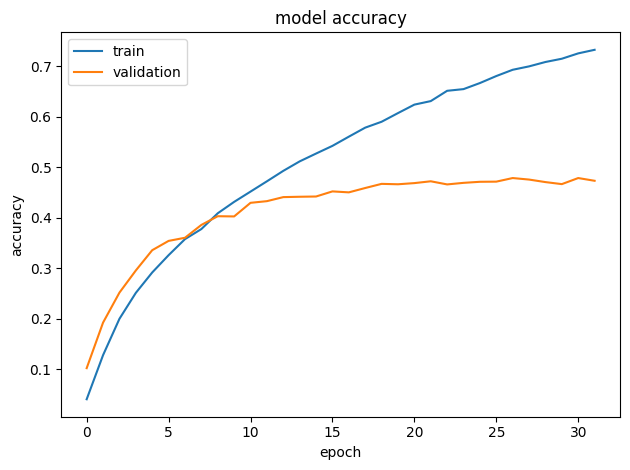

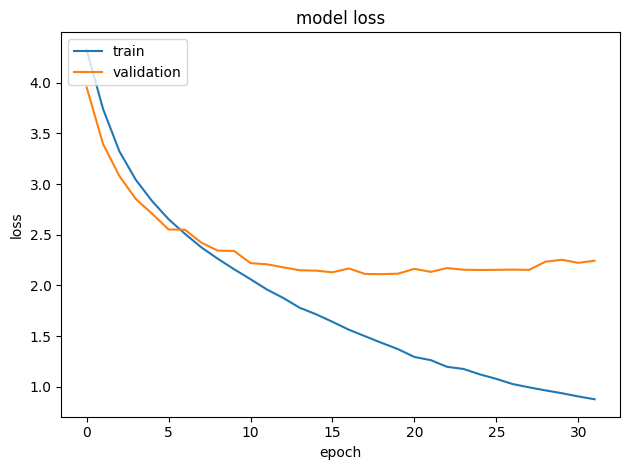

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("finalacc")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("finalloss")
plt.show()